In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
import time

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

import xgboost
import shap
from sklearn import tree
%matplotlib inline

**1. Load Data**

In [2]:
X= pd.read_csv('../Data/ncea_dummyData.csv')

In [3]:
y=pd.read_csv('../Data/ncea_targetData.csv')

In [4]:
y=y['Student: Age (Retention to 17)']

In [5]:
X= X.drop('QualProportion',axis=1)

**2. Partition the data**

In [6]:
#partition the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

**3. Logistic regression**

In [7]:
# Build Model
logreg= LogisticRegression(random_state=42, max_iter=1000)
# Fit Model
logreg.fit(X,y)
# Score
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7692854877005451


In [8]:
y_pred_class = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred_class))

[[67441  6250]
 [17751 12587]]


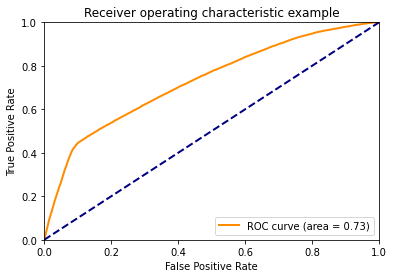

In [9]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

**SVM**

**Naive Bayes**

In [10]:
# Create a NB classifier
nb= GaussianNB()

# Train the classifier on the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_NB = nb.predict(X_test)

# Print the classification report
print(metrics.classification_report(y_test, y_pred_NB))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62     73691
           1       0.36      0.66      0.47     30338

    accuracy                           0.56    104029
   macro avg       0.57      0.59      0.55    104029
weighted avg       0.66      0.56      0.58    104029

[[38043 35648]
 [10209 20129]]


In [11]:
# Train a decision tree classifier
clf2 = tree.DecisionTreeClassifier()
clf2.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = clf2.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.7645175864422421


In [ ]:

# Define the parameter grid for grid search
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'max_features': [None, 'sqrt', 'log2']}

# Initialize the decision tree classifier
clf = tree.DecisionTreeClassifier()

# Perform grid search
grid_search_dt = GridSearchCV(clf, param_grid, cv=5)
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search_dt.best_params_

# Train a decision tree classifier with the best hyperparameters
clf = tree.DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_split'],
                                   min_samples_leaf=best_params['min_samples_leaf'],
                                   max_features=best_params['max_features'])
clf.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

In [ ]:
# visualization
fig = plt.figure(figsize=(16, 8))
vis = tree.plot_tree(clf, class_names = ['stay', 'dropout'], max_depth=4, fontsize=9, proportion=True, filled=True, rounded=True, feature_names=X.columns)

In [ ]:
print(best_params)

# Explain the model's predictions using SHAP values
explainer = shap.Explainer(logreg.predict(X_test), X_test)
shap_values = explainer(X_test)

importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
j = 11# top j importance
plt.barh(range(j), importances[indices][len(indices)-j:], color='g', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
explainer = shap.LinearExplainer(logreg, X)

In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test)